# Assignment 1: Image stitching

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from random import randrange
print(cv2.__version__)

from skimage import exposure
from skimage import filters

import ipywidgets as widgets

3.4.2


In [2]:
plt.rcParams['figure.figsize'] = [10, 5] # width, height

Prima immagine

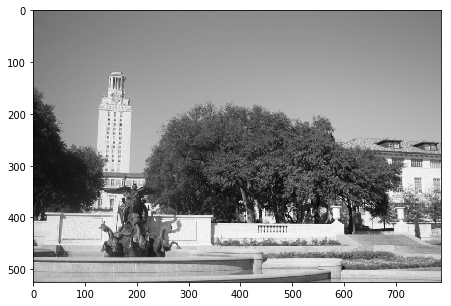

In [3]:
img1 = cv2.imread('1.jpg',0)
plt.imshow(img1, cmap = 'gray'); plt.show()

Seconda immagine

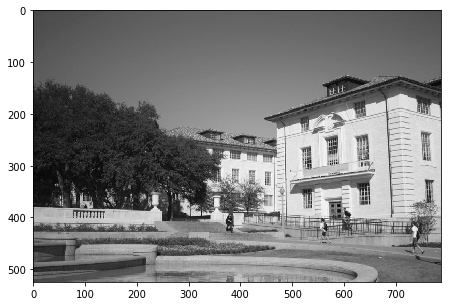

In [4]:
img2 = cv2.imread('2.jpg',0)
plt.imshow(img2, cmap = 'gray'); plt.show()

Utilizzo l'algoritmo SIFT per trovare keypoints e descrittori in ciascuna immagine

In [5]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, features1 = sift.detectAndCompute(img1,None)
kp2, features2 = sift.detectAndCompute(img2,None)

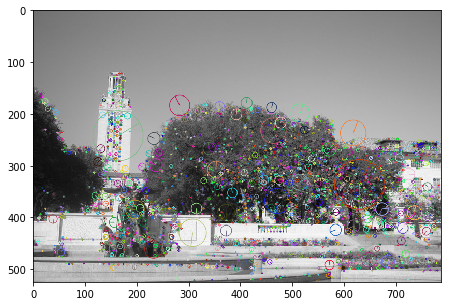

In [6]:
img1_kps = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1_kps)

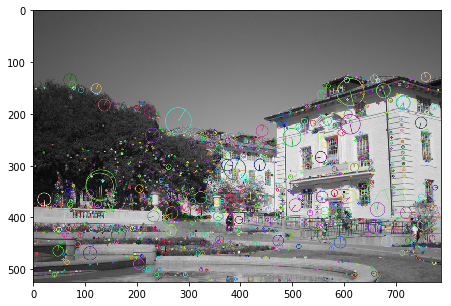

In [7]:
img2_kps = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2_kps)

Ora vengono calcolati i match fra i descrittori della prima immagine e quelli della seconda

In [8]:
bf = cv2.BFMatcher(crossCheck=True)
matches = bf.match(features1, features2)

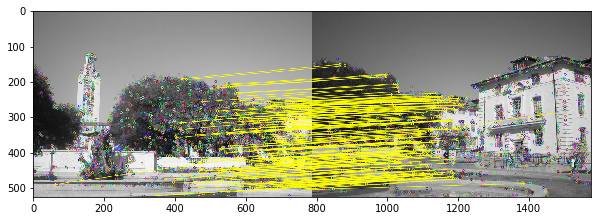

In [9]:
matches = sorted(matches, key=lambda x:x.distance)
result = cv2.drawMatches(img1, kp1, img2, kp2, matches[0:200], None, matchColor=[255,255,0])
plt.imshow(result)

Si passa al calcolo dell'omografia utilizzando RANSAC

In [10]:
src = np.float32([ kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

H, masked = cv2.findHomography(dst, src, cv2.RANSAC, 5.0)

In [11]:
matchesMask = masked.ravel().tolist()

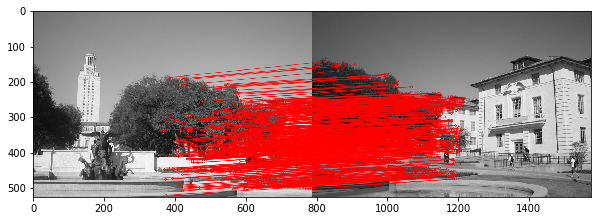

In [12]:
draw_params = dict(matchColor = (255,0,0),   #combinazione RGB per il Rosso
                   singlePointColor = None,
                   matchesMask=matchesMask,
                   flags = 2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,**draw_params)
plt.imshow(img3)

In [13]:
final = cv2.warpPerspective(img2, H, (1215, 525))

h, w = img1.shape
final[0:h, 0:w] = img1

### Output:

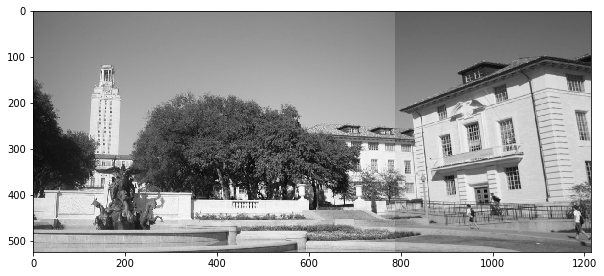

In [14]:
plt.imshow(final, cmap = 'gray')

Osservando il risultato, risulta evidente che la seconda immagine è più scura. Si cercherà di schiarirla, per rendere il risultato più verosimile

In [15]:
final.shape

(525, 1215)

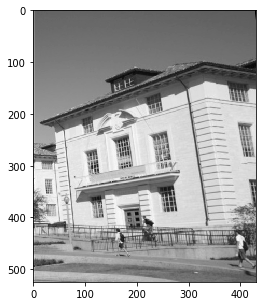

In [16]:
ritaglio = final[ 0:525, 785:1215]
plt.imshow(ritaglio, cmap = 'gray')

In [17]:
def gamma_correct(gamma=1.0):
    ax1 = plt.subplot(121)
    ax1.imshow(ritaglio**gamma, cmap='gray');

    ax2 = plt.subplot(122)
    xs = np.array(range(0,101))/100.0
    ys = xs**gamma
    ax2.plot([0,1],[0,1],dashes=[1, 1])
    ax2.plot(xs,ys)
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
gamma_slider = widgets.FloatLogSlider(min=-1, max=1, base=10, value=1.0)
widgets.interact(gamma_correct, gamma=gamma_slider)

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=1.0, min=-1.0), Output()), _dom_class…

<function __main__.gamma_correct(gamma=1.0)>

In [18]:
ritaglio = ritaglio/255.0

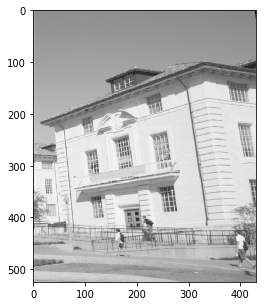

In [19]:
plt.imshow(ritaglio**0.6, cmap='gray'); plt.clim(0,1); plt.show()

In [20]:
new_rit = ritaglio**0.6

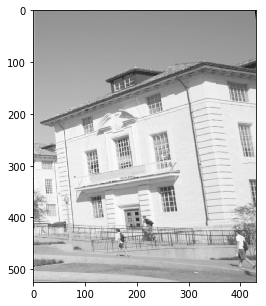

In [21]:
plt.imshow(new_rit, 'gray')

In [22]:
new_rit = new_rit*225

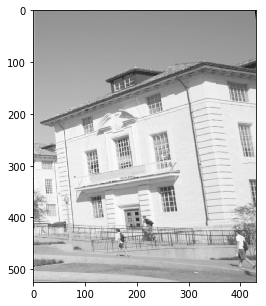

In [23]:
plt.imshow(new_rit, 'gray')

In [24]:
final_over = final
final_over[0:0+new_rit.shape[0], 785:785+new_rit.shape[1]] = new_rit

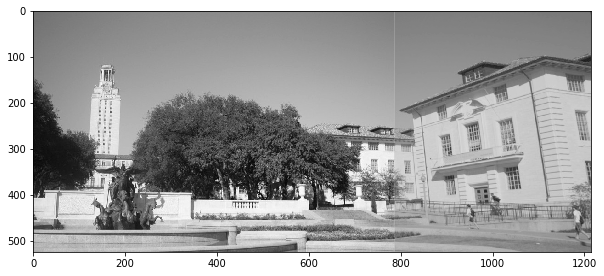

In [25]:
plt.imshow(final_over, 'gray')